# Predicting Bike Rentals

## Project description

We have several towns in American cities where it is possible to rent bikes at stations, it is possible to rent by the hour or by the day. We will be working with data that records the number of bikes rented at a given time of day. We have a dictionary of data on all our columns below.

#### <li>instant - A unique sequential ID number for each row</li>
#### <li>dteday - The date of the rentals</li>
#### <li>season - The season in which the rentals occurred</li>
#### <li>yr - The year the rentals occurred</li>
#### <li>mnth - The month the rentals occurred</li>
#### <li>hr - The hour the rentals occurred</li>
#### <li>holiday - Whether or not the day was a holiday</li>
#### <li>weekday - The day of the week (as a number, 0 to 7)</li>
#### <li>workingday - Whether or not the day was a working day</li>
#### <li>weathersit - The weather (as a categorical variable)</li>
#### <li>temp - The temperature, on a 0-1 scale</li>
#### <li>atemp - The adjusted temperature</li>
#### <li>hum - The humidity, on a 0-1 scale</li>
#### <li>windspeed - The wind speed, on a 0-1 scale</li>
#### <li>casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)</li>
#### <li>registered - The number of registered riders (people who had already signed up)</li>
#### <li>cnt - The total number of bike rentals (casual + registered)</li>

Our goal here is predicting of total number of bikes rented in a given hour. We will used cnt column for this task. Also we will not use casual and registered columns.

In [1]:
## let's read the csv file
import pandas as pd

bike_rentals= pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


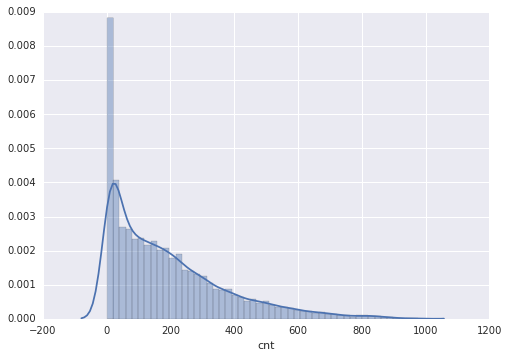

In [2]:
## let's look at the distribution of rentals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.distplot(bike_rentals["cnt"])
plt.show()

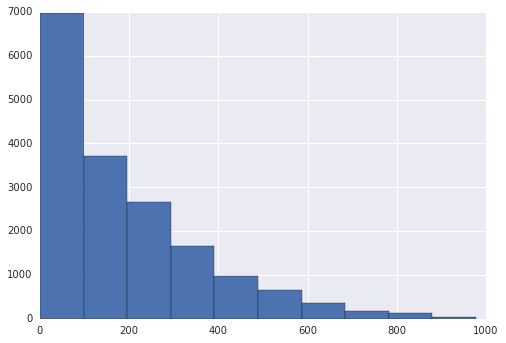

In [3]:
plt.hist(bike_rentals["cnt"])
plt.show()

We notice that mostly of number bikes between 0-200 are rented for a given hour 

In [4]:
correlation= bike_rentals.drop(["casual","registered"],axis=1).corr()["cnt"]
correlation

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
cnt           1.000000
Name: cnt, dtype: float64

we have a good correlation with some columns.

In [8]:
def assign_label(val):
    if val in range(6,12):
        return 1
    elif val in range(12,18):
        return 2
    elif val in range(18,24):
        return 3
    elif val in range(0,6):
        return 4
    else:
        print("Erreur")

time_label= bike_rentals["hr"].apply(assign_label)
bike_rentals["time_label"]= time_label

Among the existing metrics that I know, I would choose the root mean squared error because it allows to observe the errors caused by much larger values in the distribution also allows to give the errors in real values.

In [16]:
### Let's select 80% of the rows for our training
train= bike_rentals[:int(len(bike_rentals)*0.8)]
test= bike_rentals[int(len(bike_rentals)*0.8):]

In [19]:
## Let's keep just columns with correlation coefficent greater than (-0.3, 0.3)
columns= bike_rentals.drop(["casual","dteday","cnt","registered","instant","season","yr","mnth","weekday","weathersit","weathersit"],axis=1).columns
columns

Index(['hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

In [26]:
## Let's build our linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

lr= LinearRegression()
lr.fit(train[columns],train["cnt"])
prediction= lr.predict(test[columns])
rmse= mean_squared_error(test["cnt"],prediction)**(1/2)
print(rmse)

188.84990122333087


We have an error who can acceptable but, we could improve it by changing some params of our models.

In [24]:
## Let's build our decision tree model
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(train[columns],train["cnt"])
prediction= dt.predict(test[columns])
rmse= mean_squared_error(test["cnt"],prediction)**(1/2)
print(rmse)

130.63148579661566


We notice the error get decreased.

In [37]:
## Let's modify min_samples_leaf param

dt= DecisionTreeRegressor(min_samples_leaf= 10)
dt.fit(train[columns],train["cnt"])
prediction= dt.predict(test[columns])
rmse= mean_squared_error(test["cnt"],prediction)**(1/2)
print(rmse)

117.28805524085355


We have changed the error and it has get decreased

In [39]:
## Let's build our random forest model
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(train[columns],train["cnt"])
prediction= rf.predict(test[columns])
rmse= mean_squared_error(test["cnt"],prediction)**(1/2)
print(rmse)

118.1410351827399


In [54]:
## Let's modify some params

rf= RandomForestRegressor(min_samples_leaf=10, max_depth= 100)
rf.fit(train[columns],train["cnt"])
prediction= rf.predict(test[columns])
rmse= mean_squared_error(test["cnt"],prediction)**(1/2)
print(rmse)

116.78701731470446


We have still decreased our error by modifying our params, So endly it's random forest model who give us best performs.